<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_219221189_1_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.005)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 219221189
period = 22.5700168081831  # Orbital period in days
epoch = 1395.99147351244
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.45]
folded_lc = folded_lc[folded_lc.time > -0.45]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_219221189_all_sector_lightcurve.csv


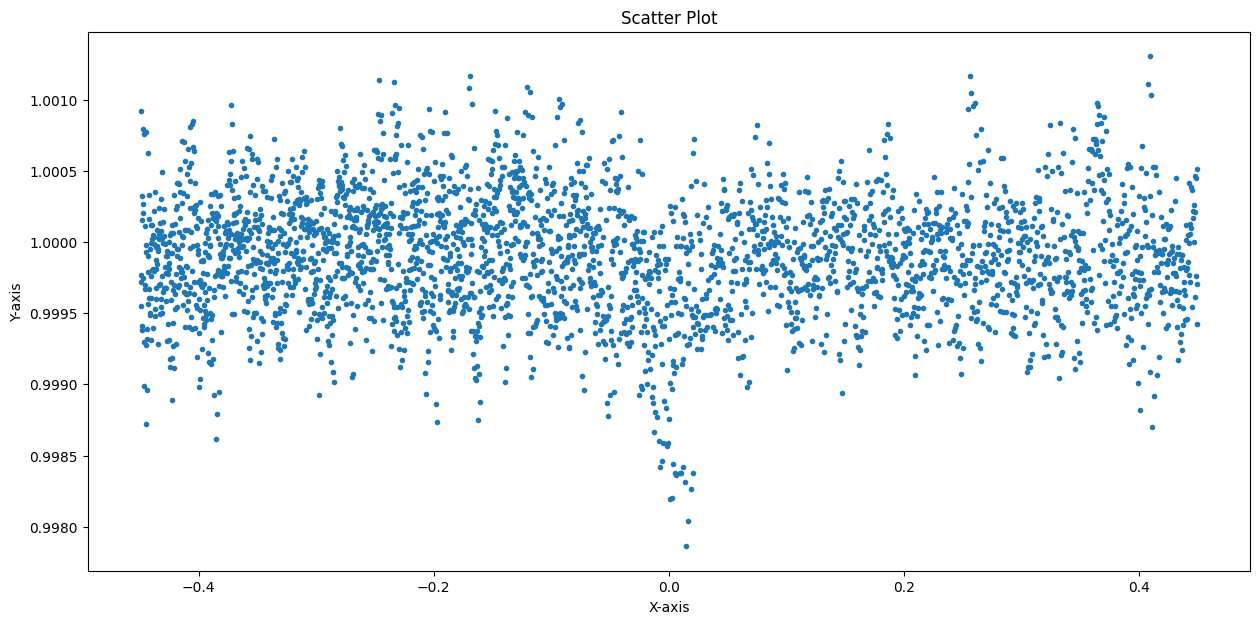

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([3, 4, 5, 30, 31])
target = tr.target(ID=ID, sectors=sectors, search_radius=6) # target radius shorted

<ipython-input-7-50d7d339fb09>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_3, ap_4, ap_5, ap_30, ap_31])


Sector 3


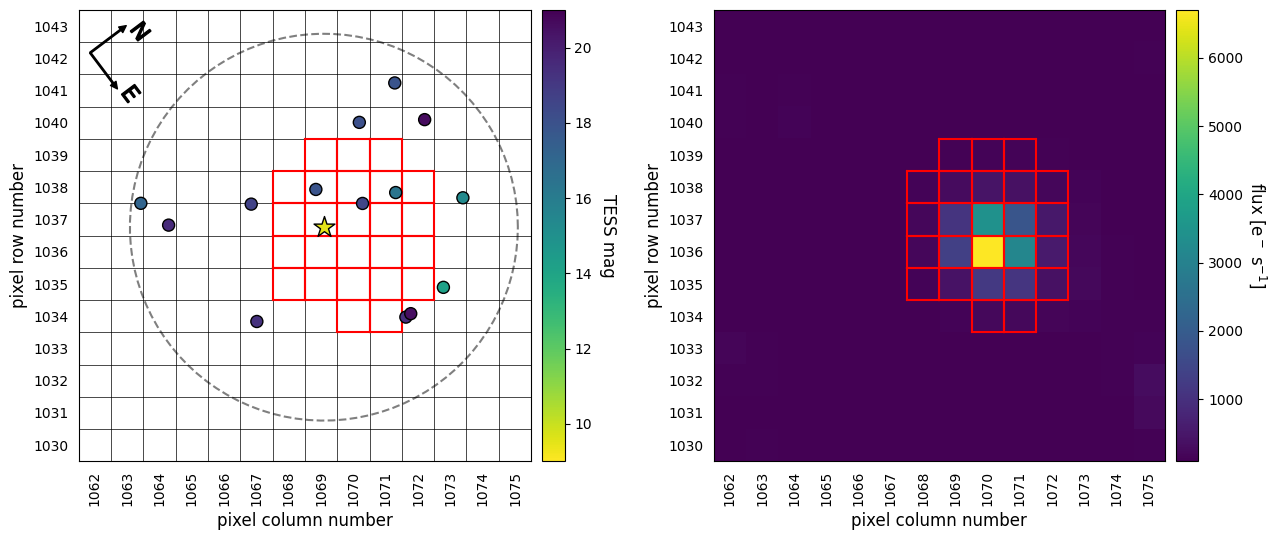

Sector 4


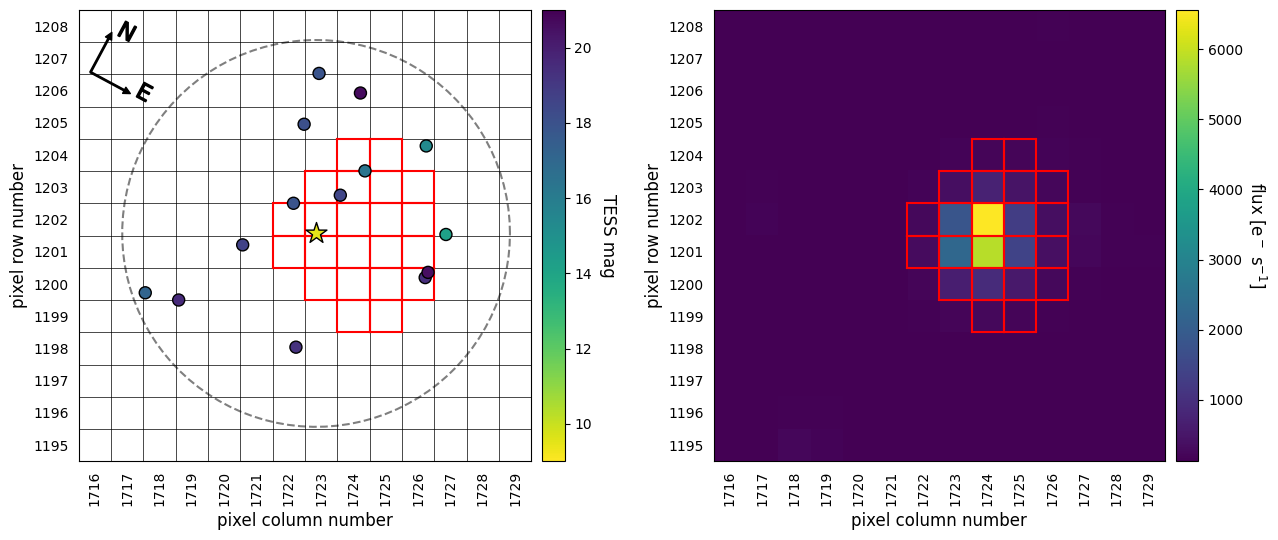

Sector 5


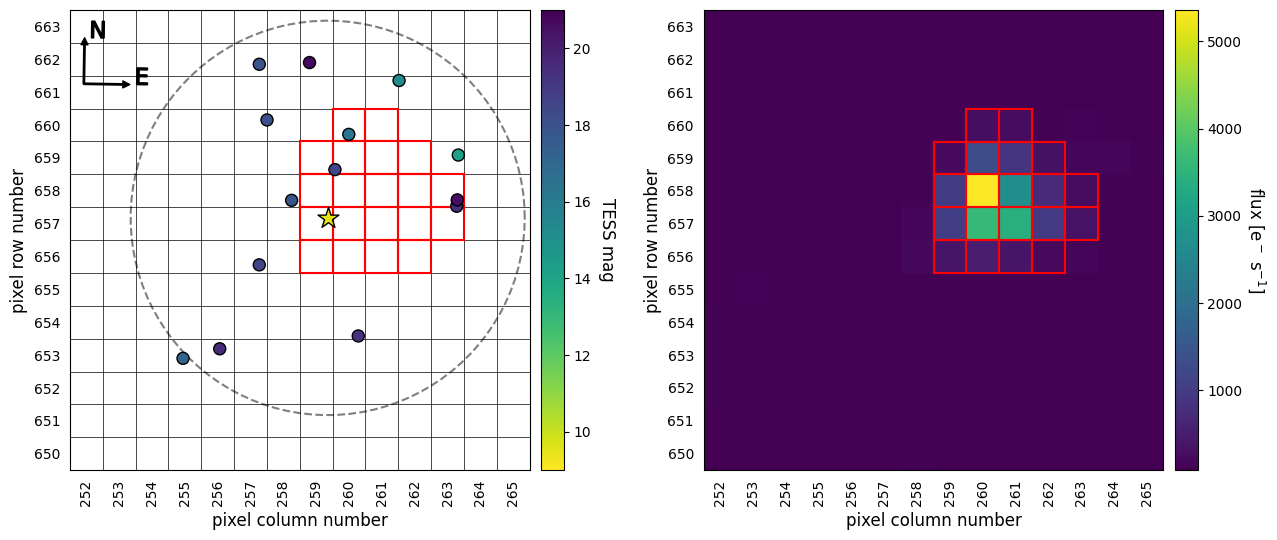

Sector 30


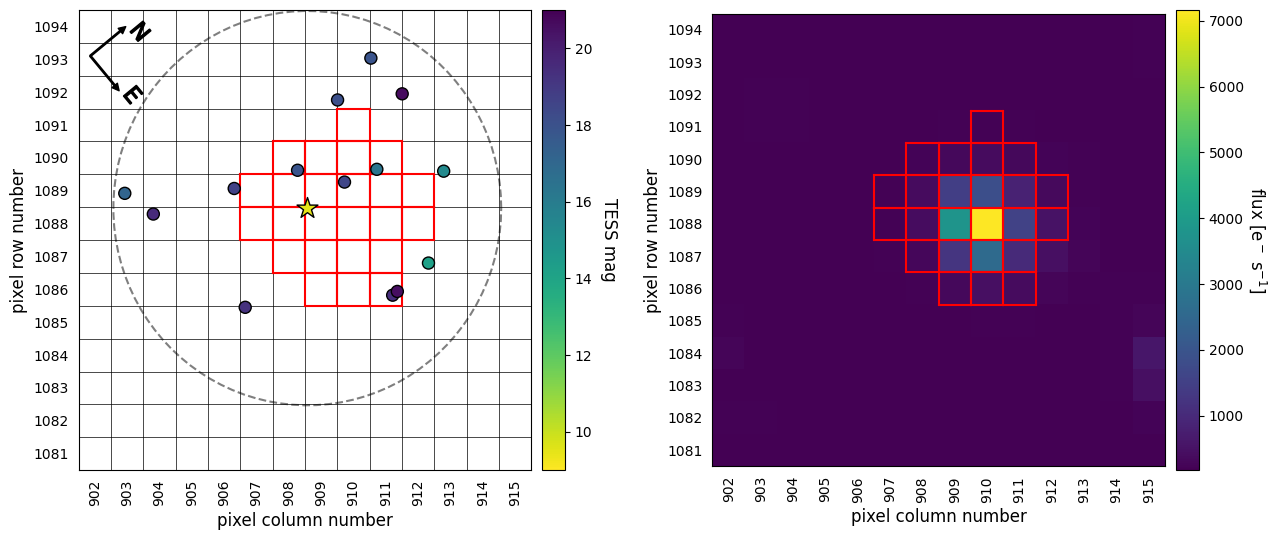

Sector 31


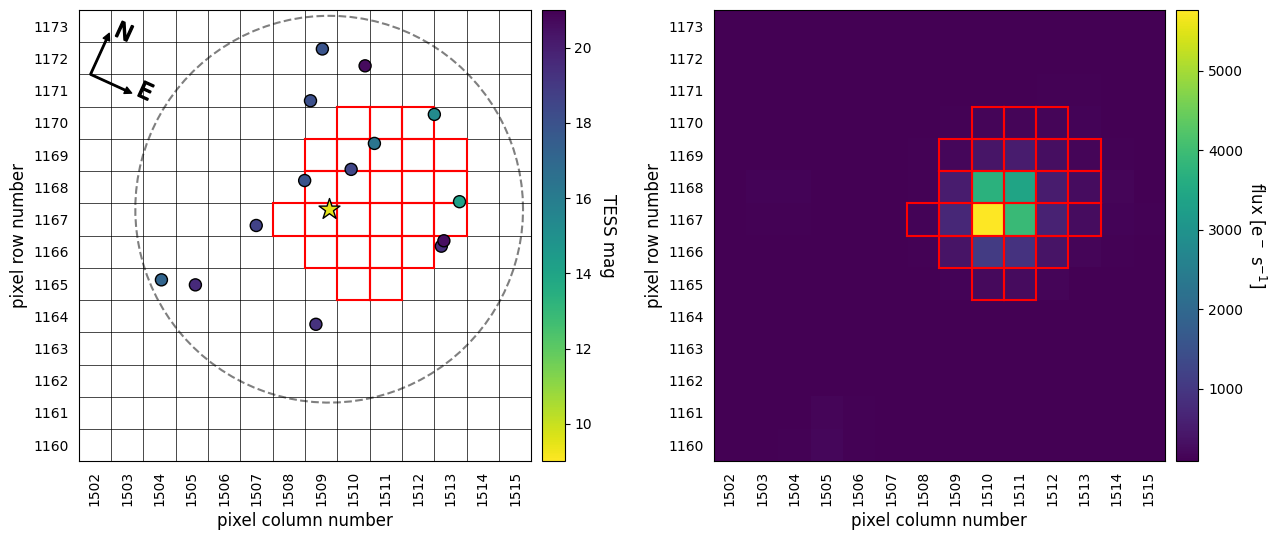

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,219221189,9.47061,7.948,7.428,7.135,62.315285,-53.373692,0.402430,0.409738,3399.0,66.071400,0.000,0.000
1,685355292,17.90020,NaN,NaN,NaN,62.304952,-53.370814,0.640000,0.495575,4086.0,0.740104,24.491,295.015
2,685355289,18.49610,NaN,NaN,NaN,62.316334,-53.365607,NaN,NaN,NaN,4.919940,29.192,4.426
3,685355291,18.64630,NaN,NaN,NaN,62.297271,-53.381662,0.620000,0.619298,3985.0,-0.093583,48.166,233.427
4,219221192,16.32230,14.908,14.259,14.059,62.319472,-53.359685,0.466381,0.468790,3453.0,2.245030,51.218,10.115
5,685355294,18.07140,NaN,NaN,NaN,62.296556,-53.357411,NaN,NaN,5392.0,0.241172,71.090,325.524
6,685355288,19.26570,NaN,NaN,NaN,62.326090,-53.393386,NaN,NaN,NaN,2.285610,74.599,161.885
7,685355315,19.42120,NaN,NaN,NaN,62.350770,-53.371515,NaN,NaN,3714.0,0.977157,76.614,84.145
8,685355316,20.54460,NaN,NaN,NaN,62.350795,-53.370448,NaN,NaN,NaN,NaN,77.156,81.310
9,219223541,14.19070,13.612,13.307,13.199,62.350187,-53.362949,1.060000,0.939268,5858.0,1.045160,84.356,62.727


In [7]:
ap_3 = np.array([[1068.0, 1035.0], [1068.0, 1036.0], [1068.0, 1037.0], [1068.0, 1038.0],
      [1069.0, 1035.0], [1069.0, 1036.0], [1069.0, 1037.0], [1069.0, 1038.0], [1069.0,
        1039.0], [1070.0, 1034.0], [1070.0, 1035.0], [1070.0, 1036.0], [1070.0, 1037.0],
      [1070.0, 1038.0], [1070.0, 1039.0], [1071.0, 1034.0], [1071.0, 1035.0], [1071.0,
        1036.0], [1071.0, 1037.0], [1071.0, 1038.0], [1071.0, 1039.0], [1072.0, 1035.0],
      [1072.0, 1036.0], [1072.0, 1037.0], [1072.0, 1038.0]])
ap_4 = np.array([[1722.0, 1201.0],
      [1722.0, 1202.0], [1723.0, 1200.0], [1723.0, 1201.0], [1723.0, 1202.0], [1723.0,
        1203.0], [1724.0, 1199.0], [1724.0, 1200.0], [1724.0, 1201.0], [1724.0, 1202.0],
      [1724.0, 1203.0], [1724.0, 1204.0], [1725.0, 1199.0], [1725.0, 1200.0], [1725.0,
        1201.0], [1725.0, 1202.0], [1725.0, 1203.0], [1725.0, 1204.0], [1726.0, 1200.0],
      [1726.0, 1201.0], [1726.0, 1202.0], [1726.0, 1203.0]])
ap_5 = np.array([[259.0, 656.0], [
        259.0, 657.0], [259.0, 658.0], [259.0, 659.0], [260.0, 656.0], [260.0, 657.0],
      [260.0, 658.0], [260.0, 659.0], [260.0, 660.0], [261.0, 656.0], [261.0, 657.0],
      [261.0, 658.0], [261.0, 659.0], [261.0, 660.0], [262.0, 656.0], [262.0, 657.0],
      [262.0, 658.0], [262.0, 659.0], [263.0, 657.0], [263.0, 658.0]])
ap_30 = np.array([[907.0,
        1088.0], [907.0, 1089.0], [908.0, 1087.0], [908.0, 1088.0], [908.0, 1089.0],
      [908.0, 1090.0], [909.0, 1086.0], [909.0, 1087.0], [909.0, 1088.0], [909.0,
        1089.0], [909.0, 1090.0], [910.0, 1086.0], [910.0, 1087.0], [910.0, 1088.0],
      [910.0, 1089.0], [910.0, 1090.0], [910.0, 1091.0], [911.0, 1086.0], [911.0,
        1087.0], [911.0, 1088.0], [911.0, 1089.0], [911.0, 1090.0], [912.0, 1088.0],
      [912.0, 1089.0]])
ap_31 = np.array([[1508.0, 1167.0], [1509.0, 1166.0], [1509.0, 1167.0],
      [1509.0, 1168.0], [1509.0, 1169.0], [1510.0, 1165.0], [1510.0, 1166.0], [1510.0,
        1167.0], [1510.0, 1168.0], [1510.0, 1169.0], [1510.0, 1170.0], [1511.0, 1165.0],
      [1511.0, 1166.0], [1511.0, 1167.0], [1511.0, 1168.0], [1511.0, 1169.0], [1511.0,
        1170.0], [1512.0, 1166.0], [1512.0, 1167.0], [1512.0, 1168.0], [1512.0, 1169.0],
      [1512.0, 1170.0], [1513.0, 1167.0], [1513.0, 1168.0], [1513.0, 1169.0]])

apertures = np.array([ap_3, ap_4, ap_5, ap_30, ap_31])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [8]:
tdepth = 0.483 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,219221189,9.47061,7.948,7.428,7.135,62.315285,-53.373692,0.402430,0.409738,3399.0,66.071400,0.000,0.000,9.925009e-01,0.000487
1,685355292,17.90020,NaN,NaN,NaN,62.304952,-53.370814,0.640000,0.495575,4086.0,0.740104,24.491,295.015,2.823249e-04,0.000000
2,685355289,18.49610,NaN,NaN,NaN,62.316334,-53.365607,NaN,NaN,NaN,4.919940,29.192,4.426,2.450598e-04,0.000000
3,685355291,18.64630,NaN,NaN,NaN,62.297271,-53.381662,0.620000,0.619298,3985.0,-0.093583,48.166,233.427,3.208727e-05,0.000000
4,219221192,16.32230,14.908,14.259,14.059,62.319472,-53.359685,0.466381,0.468790,3453.0,2.245030,51.218,10.115,1.618935e-03,0.298344
5,685355294,18.07140,NaN,NaN,NaN,62.296556,-53.357411,NaN,NaN,5392.0,0.241172,71.090,325.524,4.092604e-05,0.000000
6,685355288,19.26570,NaN,NaN,NaN,62.326090,-53.393386,NaN,NaN,NaN,2.285610,74.599,161.885,3.162933e-06,0.000000
7,685355315,19.42120,NaN,NaN,NaN,62.350770,-53.371515,NaN,NaN,3714.0,0.977157,76.614,84.145,5.488283e-05,0.000000
8,685355316,20.54460,NaN,NaN,NaN,62.350795,-53.370448,NaN,NaN,NaN,NaN,77.156,81.310,1.923321e-05,0.000000
9,219223541,14.19070,13.612,13.307,13.199,62.350187,-53.362949,1.060000,0.939268,5858.0,1.045160,84.356,62.727,4.327400e-03,0.111614


In [19]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/300
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 219221189.
Calculating EB and EBx2P scenario probabilities for 219221189.
Calculating PTP scenario probability for 219221189.
Calculating PEB and PEBx2P scenario probabilities for 219221189.
Calculating STP scenario probability for 219221189.
Calculating SEB and SEBx2P scenario probabilities for 219221189.
Calculating DTP scenario probability for 219221189.
Calculating DEB and DEBx2P scenario probabilities for 219221189.
Calculating BTP scenario probability for 219221189.
Calculating BEB and BEBx2P scenario probabilities for 219221189.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 219221192.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 219223541.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 219221195.
CPU times: user 2min 21s, sys: 5.13 s, total: 2min 27s
Wall time: 1min 58s


In [20]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.79531247
NFPP = 0.12706543


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,219221189,TP,0.402430,0.409738,22.570017,89.407609,0.368439,0.606803,173.027182,2.060652,0.000000,0.000000,1.407004e-01
1,219221189,EB,0.402430,0.409738,22.570017,88.231722,1.548815,0.339020,74.838363,0.000000,0.370188,0.376865,1.286073e-11
2,219221189,EBx2P,0.402430,0.409738,45.140034,89.415688,0.722389,0.605265,172.161401,0.000000,0.400419,0.402595,1.586190e-03
3,219221189,PTP,0.402430,0.409738,22.570017,89.374139,0.387355,0.544936,158.398909,1.212986,0.000000,0.000000,1.594312e-02
4,219221189,PEB,0.402430,0.409738,22.570017,87.896654,1.387241,0.488607,62.096651,0.000000,0.248552,0.273408,9.942207e-13
5,219221189,PEBx2P,0.402430,0.409738,45.140034,89.425920,0.594680,0.662041,167.860789,0.000000,0.387715,0.391661,1.912490e-04
6,219221189,STP,0.245881,0.271061,22.570017,89.552064,0.403614,0.569186,178.272789,1.886462,0.000000,0.000000,1.761146e-02
7,219221189,SEB,0.331209,0.344258,22.570017,88.251865,1.681442,0.368917,42.025964,0.000000,0.209985,0.239063,2.039595e-12
8,219221189,SEBx2P,0.113074,0.138001,45.140034,89.645880,1.352750,0.623672,213.462096,0.000000,0.111589,0.136035,1.732345e-04
9,219221189,DTP,0.402430,0.409738,22.570017,89.394441,0.387467,0.727726,197.839429,1.621038,0.000000,0.000000,4.804405e-02


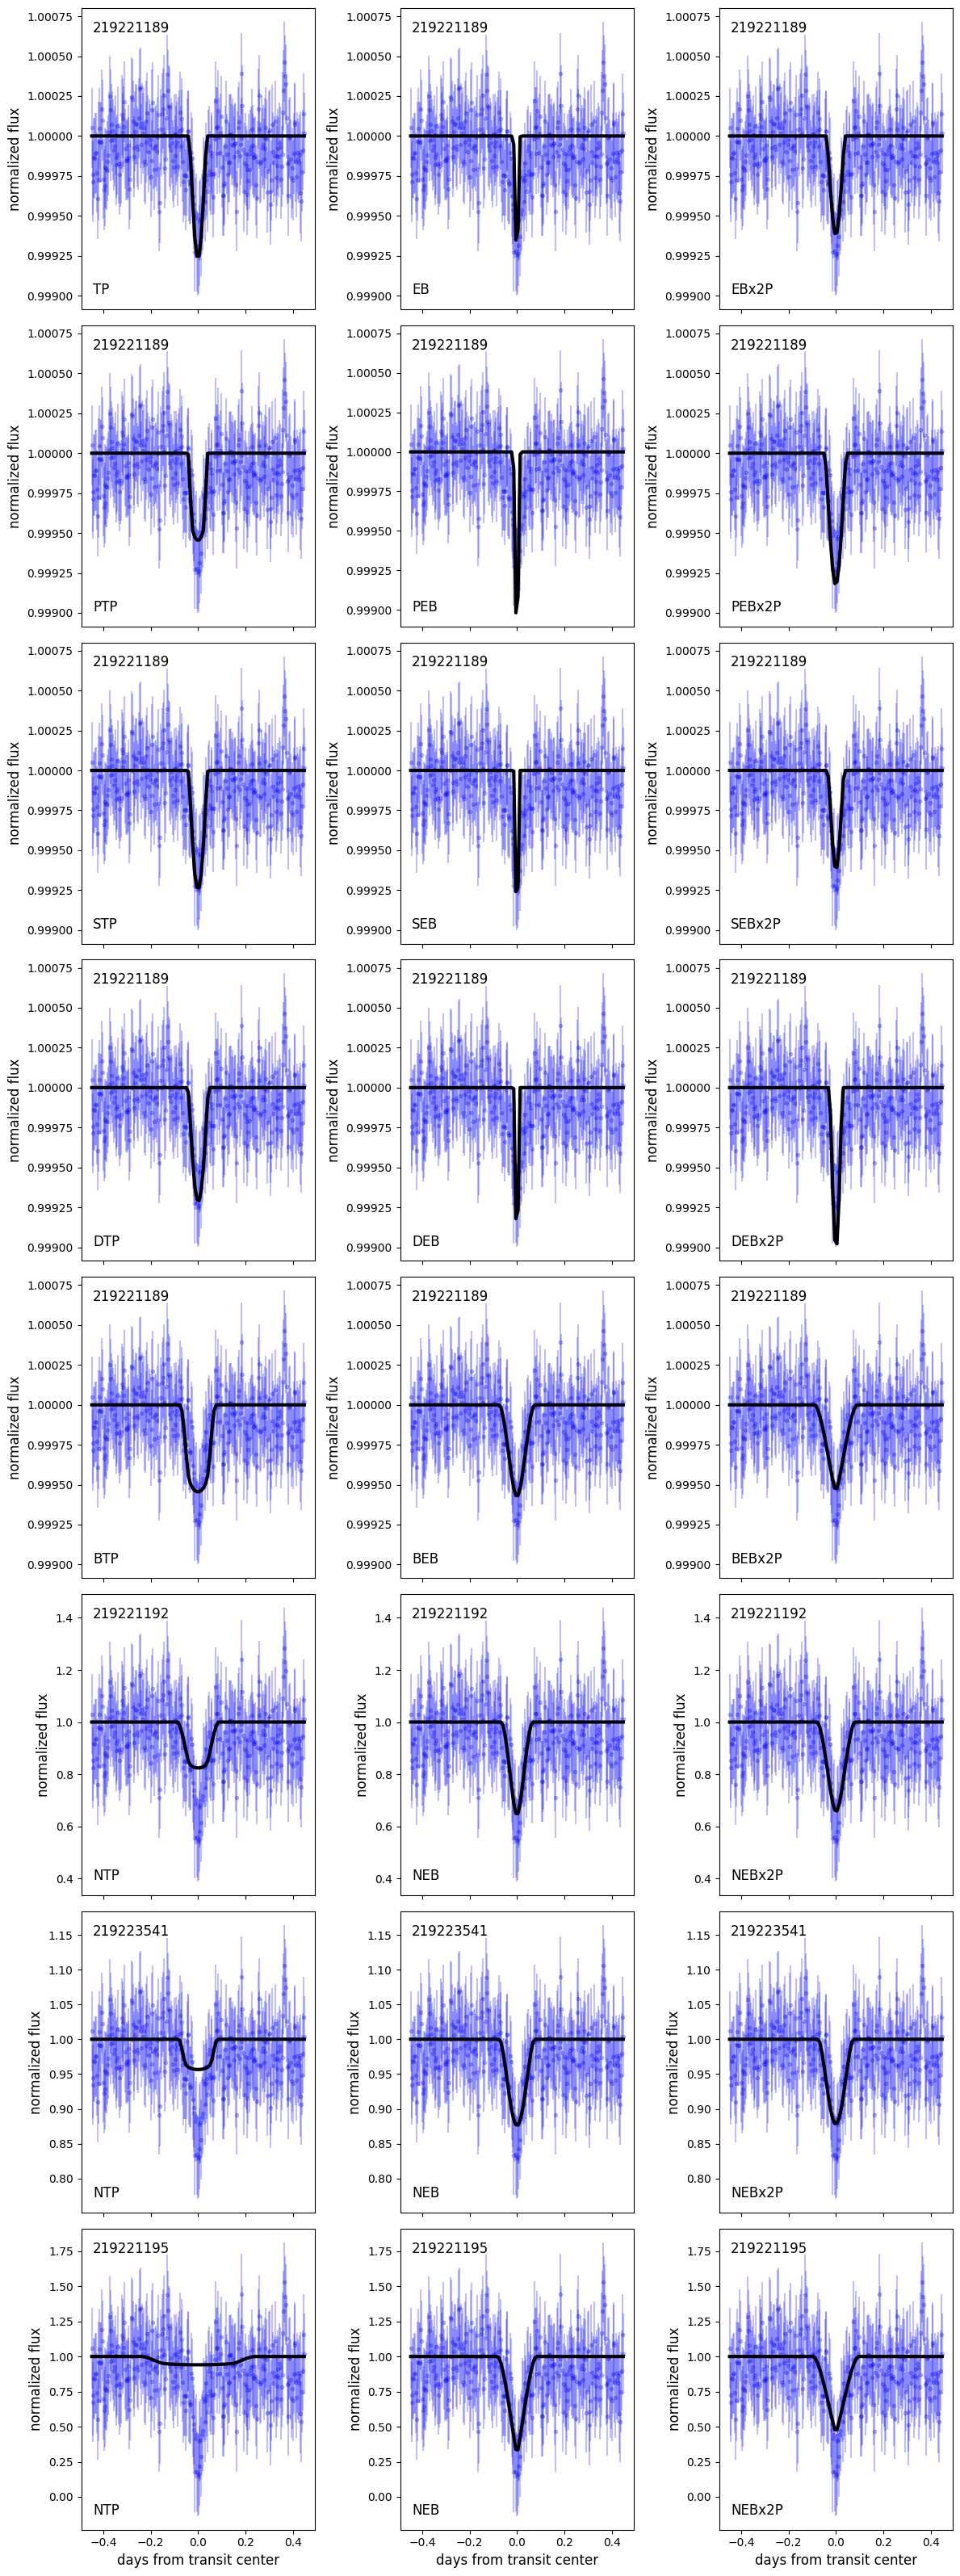

In [21]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [23]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.820710909130263 +/- 0.015443363135752189
NFPP = 0.10628545574266612 +/- 0.007089387509058993
CPU times: user 47min 6s, sys: 1min 35s, total: 48min 41s
Wall time: 38min 58s


Our final conclusion about this specified planet of TIC 219221189 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).